<a href="https://colab.research.google.com/github/fattahar/ML-Sem-7-2025/blob/midterm_ML/clustering_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install gdown if not already installed
!pip install -U -q gdown

In [2]:
# Replace 'your_folder_id' with the actual folder ID
folder_id = '1FsQtOI_QES15zZLmEw099MGAR5-rnsOP'

# Download all files from the specified Google Drive folder
# The `--folder` flag indicates that the ID belongs to a folder
# The `--id` flag is for the folder ID
# The `--output` flag (optional) can specify a directory to save files,
# but by default, it will download to the current directory.
print(f"Downloading files from folder ID: {folder_id}")
!gdown --folder --id {folder_id}

print("Download complete. You can list the files in the current directory to see the downloaded content.")

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q clusteringmidterm.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q

but Gdown can't. Please check connections and permissions.
Downlo

# 1. Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library Clustering & Preprocessing
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA # Untuk visualisasi
from sklearn.metrics import silhouette_score

# Setup Plot Style
sns.set(style="whitegrid")

# 2. Load Data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
BASE_PATH = "/content/drive/MyDrive/midterm_folder"
FILE_NAME = "clusteringmidterm.csv"

print("Membaca dataset...")
try:
    # Load dataset
    df = pd.read_csv(f"{BASE_PATH}/{FILE_NAME}")
    print(f"✅ Data berhasil diload! Ukuran awal: {df.shape}")

    # --- PEMBERSIHAN DATA AWAL (Cleaning) ---
    # Langkah ini digabung disini agar df siap dipakai untuk EDA/Scaling selanjutnya

    # 1. Buang kolom CUST_ID (karena ID unik tidak berguna untuk clustering)
    if 'CUST_ID' in df.columns:
        df = df.drop('CUST_ID', axis=1)
        print("   -> Kolom 'CUST_ID' dibuang.")

    # 2. Isi data kosong (Missing Values) dengan Median
    if df.isnull().sum().sum() > 0:
        df = df.fillna(df.median())
        print("   -> Missing values diisi dengan median.")

    print(f"✅ Data siap (Clean)! Ukuran akhir: {df.shape}")
    display(df.head())

except FileNotFoundError:
    print(f"❌ Error: File tidak ditemukan di {BASE_PATH}/{FILE_NAME}")

Membaca dataset...
✅ Data berhasil diload! Ukuran awal: (8950, 18)
   -> Kolom 'CUST_ID' dibuang.
   -> Missing values diisi dengan median.
✅ Data siap (Clean)! Ukuran akhir: (8950, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# 3. Preprocessing (Scalling)

In [9]:
# Standardize Data (Ubah agar rata-rata=0, deviasi=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Ubah kembali ke DataFrame agar rapi (opsional, tapi memudahkan)
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)

print("✅ Data berhasil dinormalisasi (Scaling).")
X_scaled_df.head()

✅ Data berhasil dinormalisasi (Scaling).


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


# 4. Menentukan Jumlah Cluster (Elbow Method)

Sedang mencari jumlah cluster optimal (Elbow Method)...


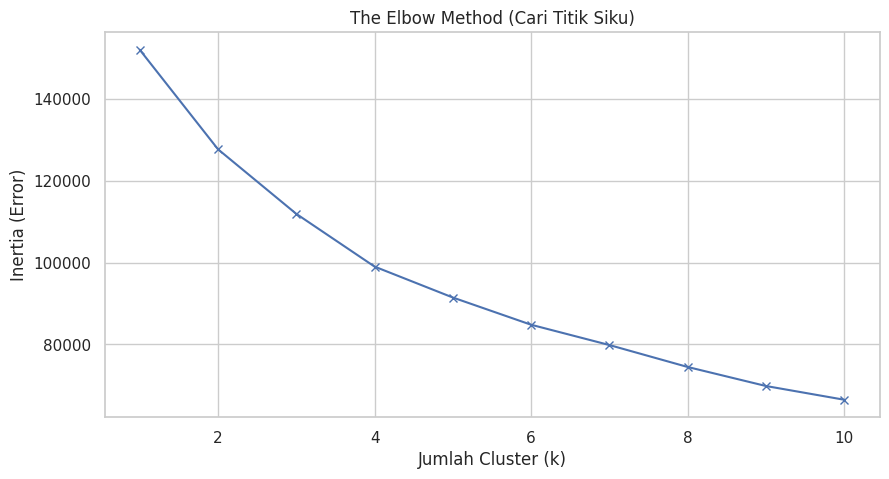

In [11]:
inertia = []
range_values = range(1, 11) # Coba cluster 1 sampai 10

print("Sedang mencari jumlah cluster optimal (Elbow Method)...")

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Grafik Elbow
plt.figure(figsize=(10, 5))
plt.plot(range_values, inertia, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (Error)')
plt.title('The Elbow Method (Cari Titik Siku)')
plt.show()


# 5. Modeling (K-Means Clustering)

In [12]:
# Kita pilih k=4 (Bisa kamu ganti jadi 3 atau 5 sesuai hasil Elbow di atas)
k = 4

print(f"🚀 Melatih K-Means dengan {k} Cluster...")
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Ambil label cluster
labels = kmeans.labels_

# Hitung Skor Evaluasi (Silhouette Score)
# Skor mendekati 1 = Bagus (Terpisah jelas)
# Skor mendekati 0 = Cluster tumpang tindih
score = silhouette_score(X_scaled, labels)
print(f"✅ Clustering Selesai!")
print(f"📊 Silhouette Score: {score:.4f}")

🚀 Melatih K-Means dengan 4 Cluster...
✅ Clustering Selesai!
📊 Silhouette Score: 0.1977


  # 6. Visualisasi dengan PCA (Principal Component Analysis)

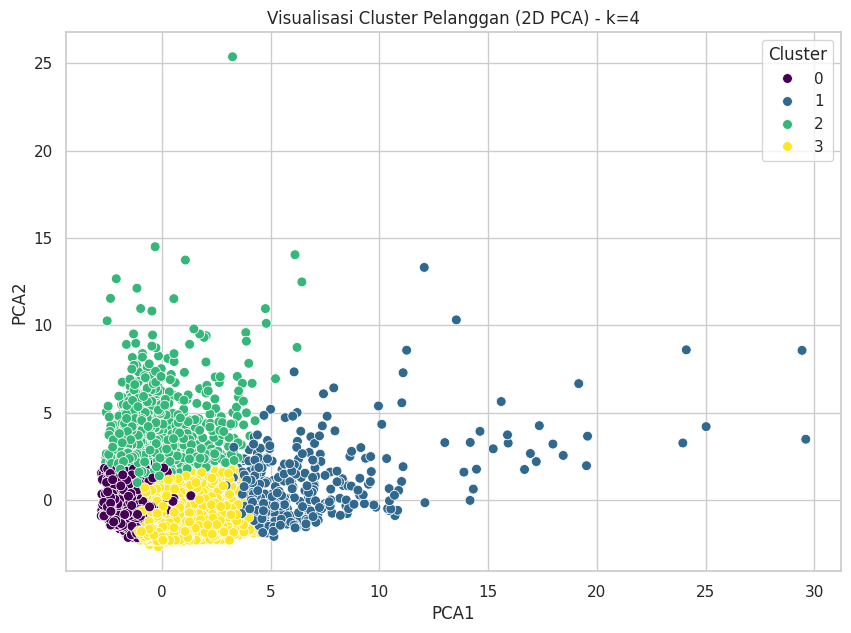

In [13]:
# Reduksi Dimensi ke 2D
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])

# Gabungkan dengan label cluster
pca_df['Cluster'] = labels

# Plot Scatter
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=50)
plt.title(f'Visualisasi Cluster Pelanggan (2D PCA) - k={k}')
plt.show()

# 7. Interpretasi Cluster

In [14]:
# Masukkan label cluster ke data ASLI (bukan data scaled) agar angkanya bisa dibaca manusia
df['Cluster'] = labels

# Hitung rata-rata tiap kolom berdasarkan Cluster
summary = df.groupby('Cluster').mean()

# Kita ambil kolom-kolom penting saja untuk interpretasi
cols_important = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT']
display(summary[cols_important].round(2))

# Analisis Otomatis Sederhana
print("\n🔍 ANALISIS SINGKAT:")
for i in range(k):
    cluster_data = summary.iloc[i]
    if cluster_data['PURCHASES'] > 2000:
        tipe = "Sultan / Spender Besar (Banyak Belanja)"
    elif cluster_data['CASH_ADVANCE'] > 2000:
        tipe = "Tarik Tunai Mania (Suka Ambil Cash)"
    elif cluster_data['BALANCE'] > 2000 and cluster_data['PAYMENTS'] < 1000:
        tipe = "Revolvers (Banyak Utang, Bayar Sedikit)"
    elif cluster_data['PURCHASES'] < 500 and cluster_data['CASH_ADVANCE'] < 500:
        tipe = "Pasif / Transaksi Rendah"
    else:
        tipe = "User Menengah / Normal"

    print(f"Cluster {i}: Kemungkinan tipe -> {tipe}")

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT
Cluster,,,,,,
0,1012.66,270.04,596.51,3278.64,974.26,0.08
1,3551.15,7681.62,653.64,9696.94,7288.74,0.29
2,4602.45,501.86,4521.51,7546.16,3484.05,0.03
3,894.91,1236.18,210.57,4213.21,1332.19,0.27



🔍 ANALISIS SINGKAT:
Cluster 0: Kemungkinan tipe -> User Menengah / Normal
Cluster 1: Kemungkinan tipe -> Sultan / Spender Besar (Banyak Belanja)
Cluster 2: Kemungkinan tipe -> Tarik Tunai Mania (Suka Ambil Cash)
Cluster 3: Kemungkinan tipe -> User Menengah / Normal
